In [66]:
from flask import Flask, render_template, request
 
import numpy as np
import os
 
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras import models

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np
import matplotlib.pyplot as plt


In [3]:
model =load_model("model/xception_v1_1.h5")
 
print('@@ Model loaded')


@@ Model loaded


In [6]:
test_image = load_img('static/user uploaded/bs.jpeg', target_size = (224, 224)) 
 
   

test_image = np.expand_dims(img_to_array(test_image)/255 , axis = 0) 
  
   
 

In [7]:
test_image

array([[[[0.36078432, 0.21568628, 0.24313726],
         [0.56078434, 0.44705883, 0.32941177],
         [0.54901963, 0.4509804 , 0.2901961 ],
         ...,
         [0.53333336, 0.48235294, 0.21568628],
         [0.5411765 , 0.4862745 , 0.19215687],
         [0.5411765 , 0.44705883, 0.20392157]],

        [[0.59607846, 0.47843137, 0.22745098],
         [0.53333336, 0.41960785, 0.24705882],
         [0.35686275, 0.23529412, 0.15294118],
         ...,
         [0.3529412 , 0.33333334, 0.10588235],
         [0.43529412, 0.43529412, 0.16078432],
         [0.50980395, 0.49019608, 0.23921569]],

        [[0.68235296, 0.5803922 , 0.14901961],
         [0.77254903, 0.6784314 , 0.25490198],
         [0.7764706 , 0.6862745 , 0.2784314 ],
         ...,
         [0.45882353, 0.44705883, 0.27058825],
         [0.47058824, 0.4862745 , 0.25490198],
         [0.5294118 , 0.5568628 , 0.28235295]],

        ...,

        [[0.2627451 , 0.2784314 , 0.3137255 ],
         [0.2627451 , 0.2784314 , 0.32156864]

In [8]:
result = model.predict(test_image)
  
print('@@ Raw result = ', result)
   
pred = np.argmax(result , axis=1) 

@@ Raw result =  [[0.0000000e+00 1.0000000e+00 2.9227495e-23 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.5436872e-37 0.0000000e+00 0.0000000e+00]]


(1, 224, 224, 3)


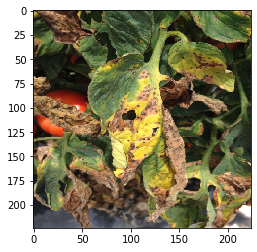

In [13]:
print(test_image.shape)
  
# Print image
import matplotlib.pyplot as plt
plt.imshow(test_image[0])
plt.show()

(1, 14, 14, 728)


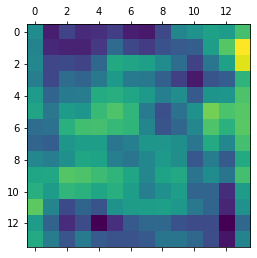

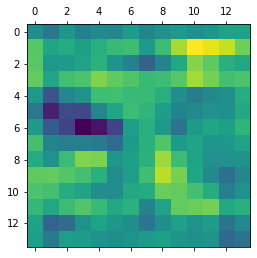

In [78]:
# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model.layers[:134]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(test_image)

# Getting Activations of first layer
first_layer_activation = activations[100]

# shape of first layer activation
print(first_layer_activation.shape)


plt.matshow(activations[100][0, :, :, 1], cmap ='viridis')

    # 15th channel of the image after first layer of convolution is applied
plt.matshow(activations[100][0, :, :, 2], cmap ='viridis')




In [70]:
layers.get_weights()

NameError: name 'layers' is not defined

In [76]:
model_weights = [] # we will save the conv layer weights in this list
conv_layers = [] # we will save the 49 conv layers in this list
# get all the model children as list
model_children = list(model.children())



# counter to keep count of the conv layers
counter = 0 
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolutional layers: {counter}")

AttributeError: 'Functional' object has no attribute 'children'

In [77]:
layer_names = []
  
for layer in model.[:134]:
  layer_names.append(layer.name)

print(layer_names)

SyntaxError: invalid syntax (<ipython-input-77-267d576f59e1>, line 3)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


/Users/deepkapadia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

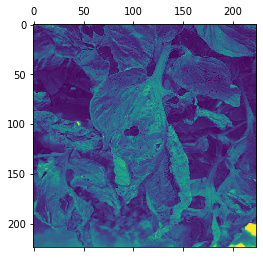

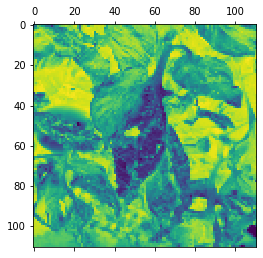

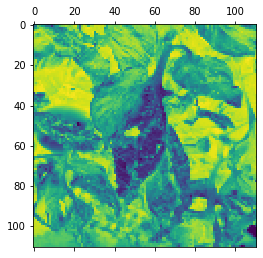

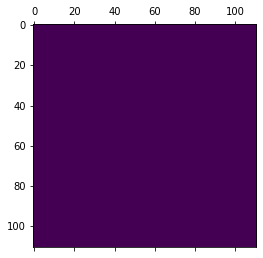

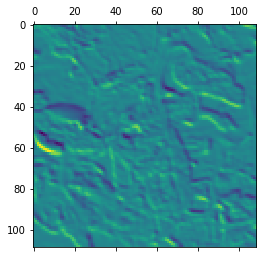

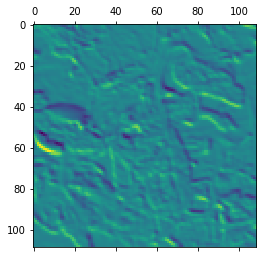

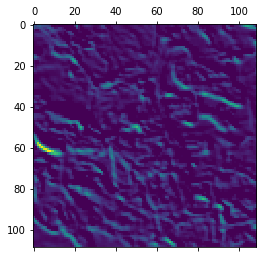

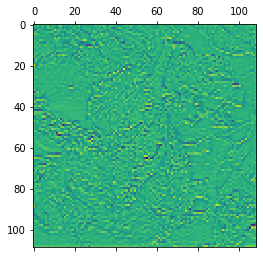

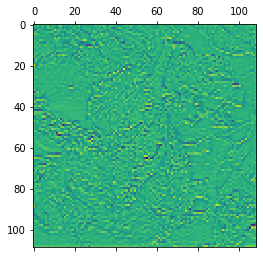

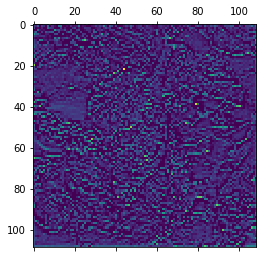

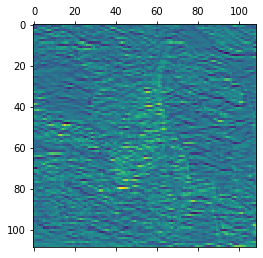

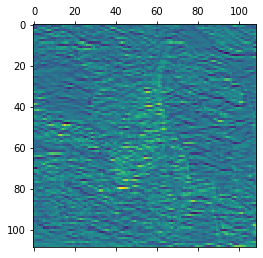

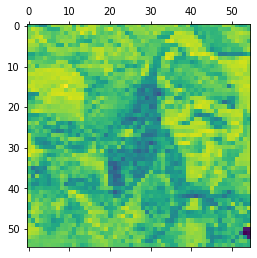

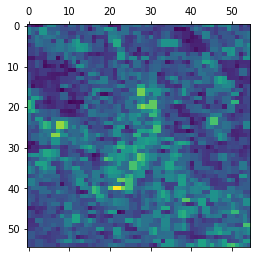

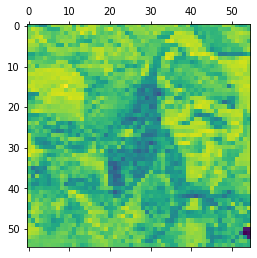

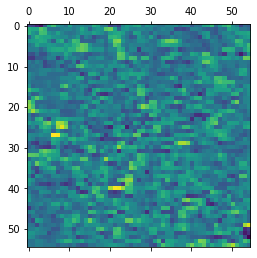

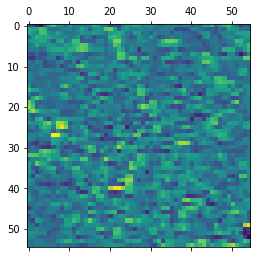

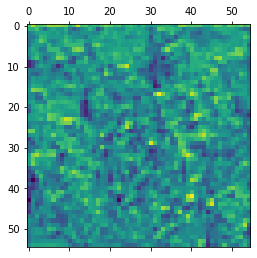

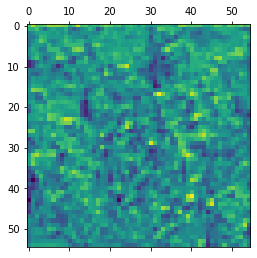

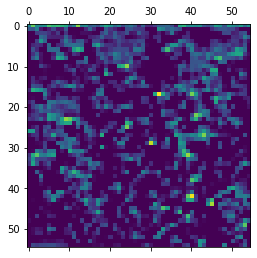

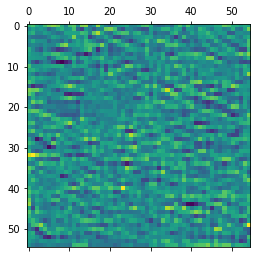

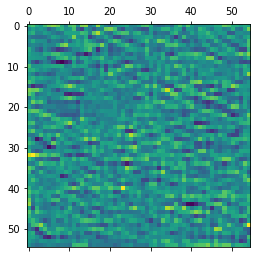

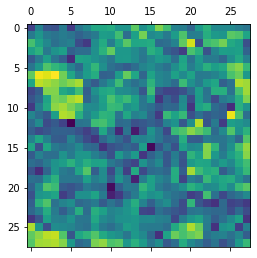

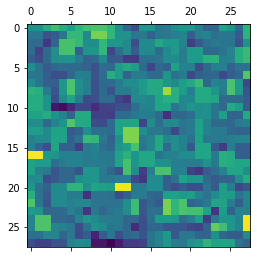

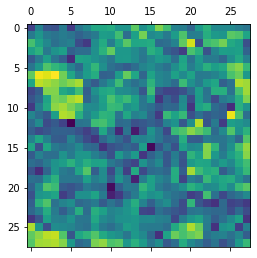

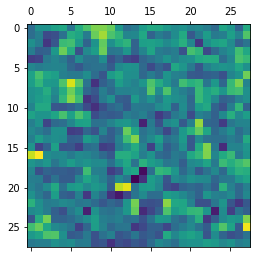

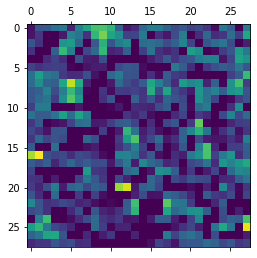

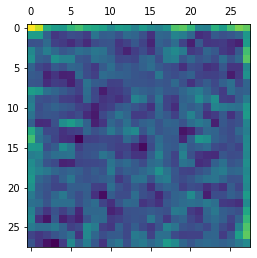

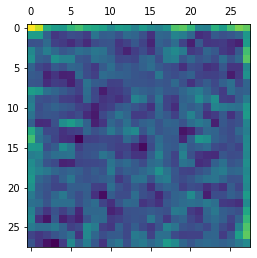

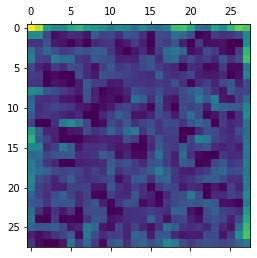

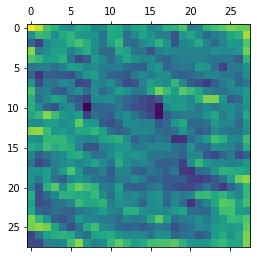

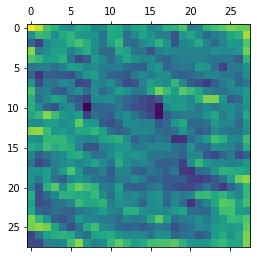

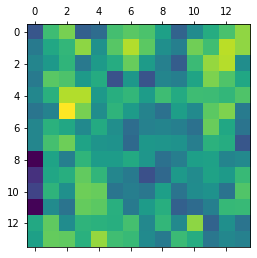

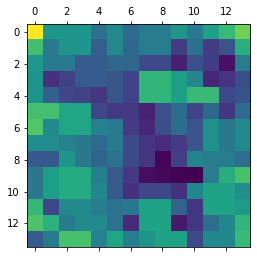

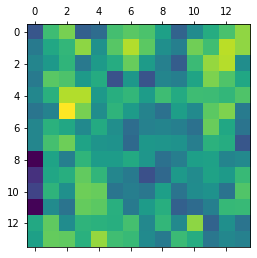

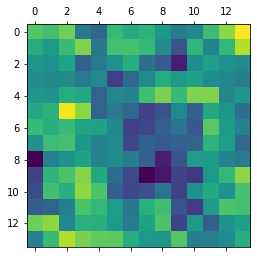

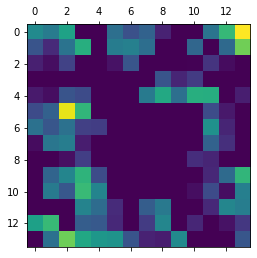

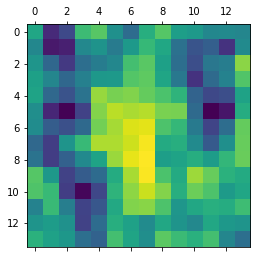

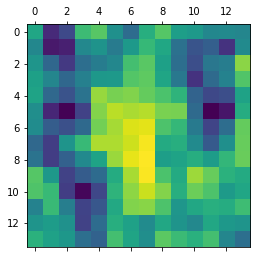

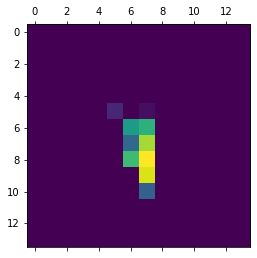

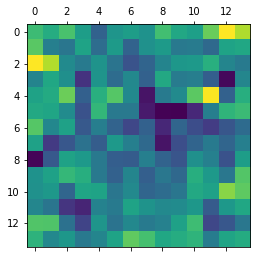

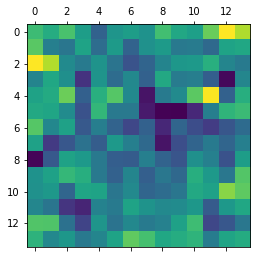

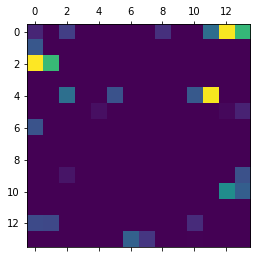

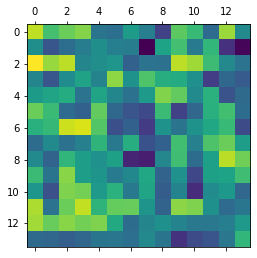

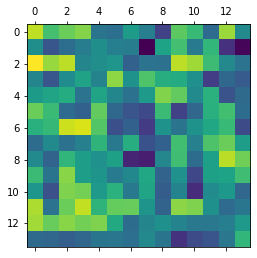

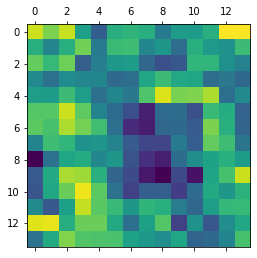

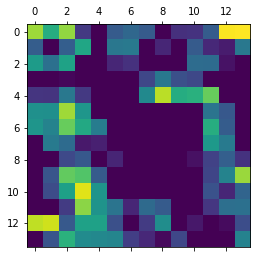

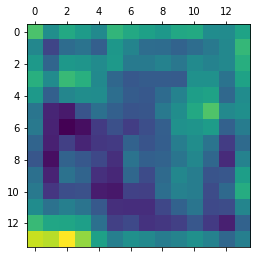

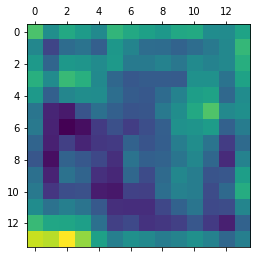

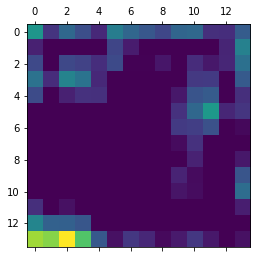

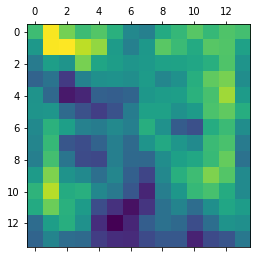

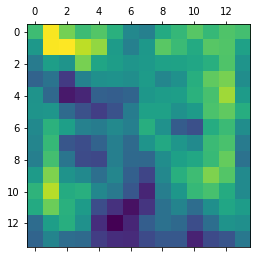

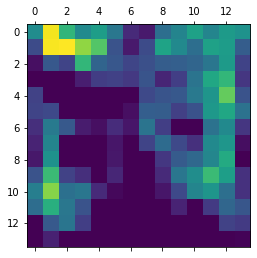

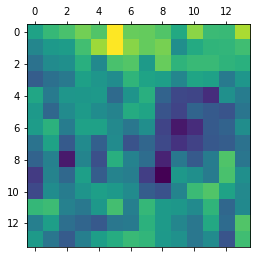

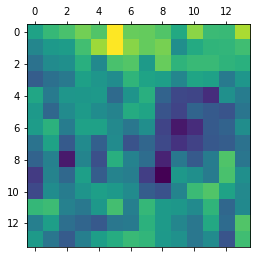

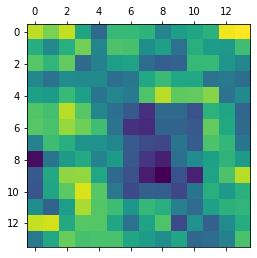

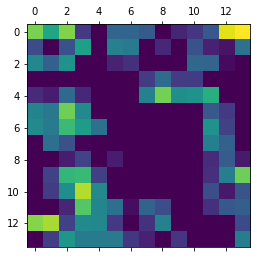

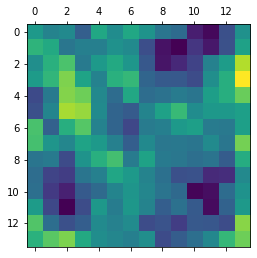

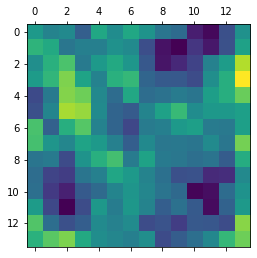

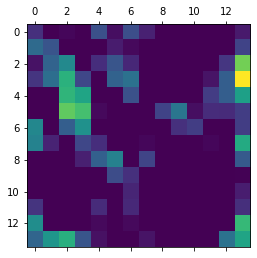

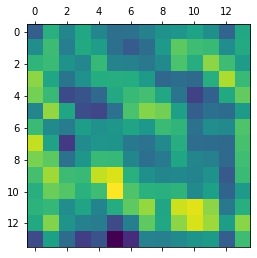

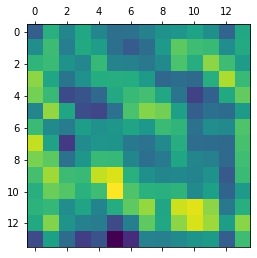

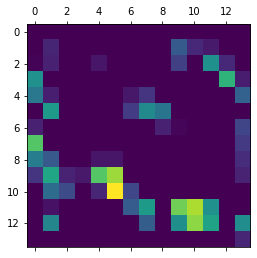

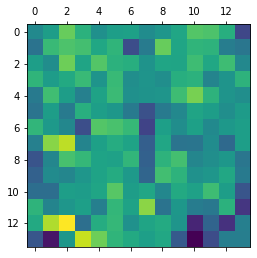

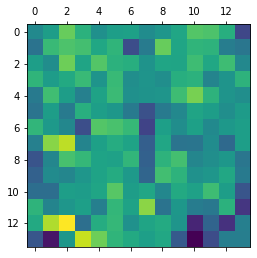

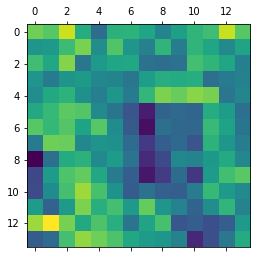

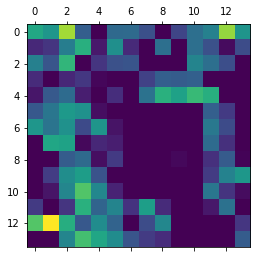

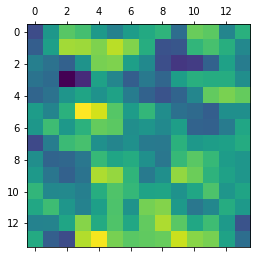

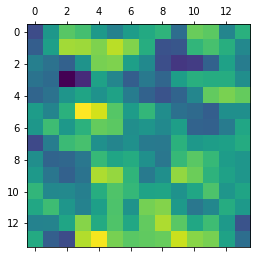

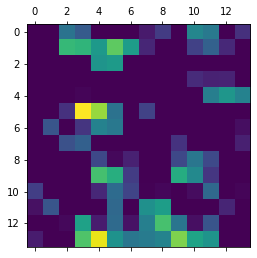

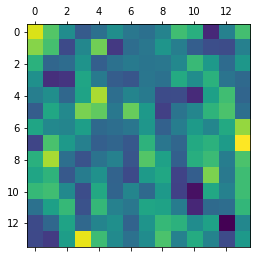

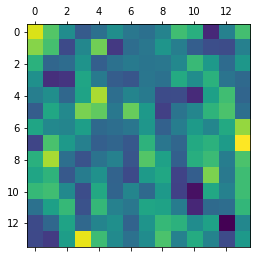

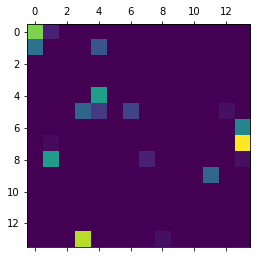

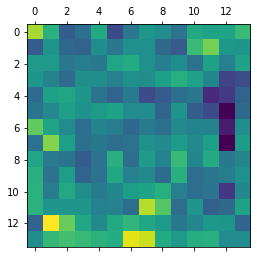

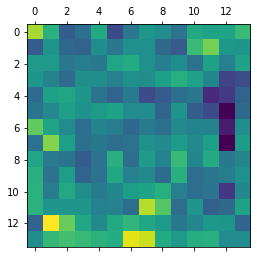

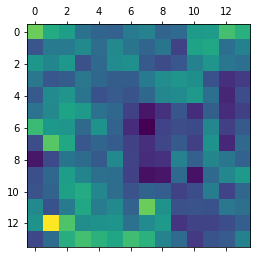

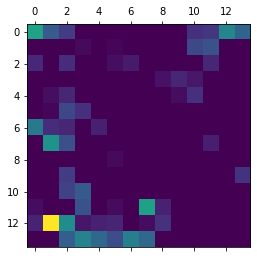

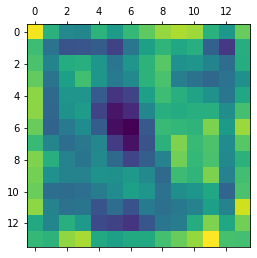

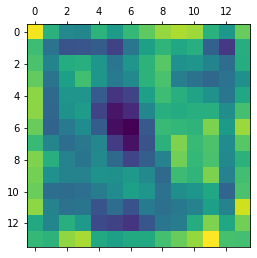

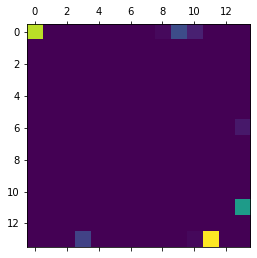

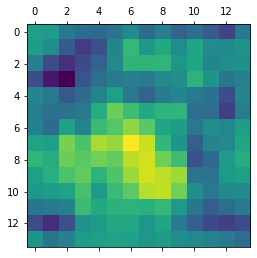

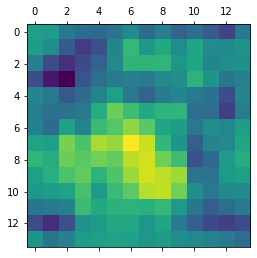

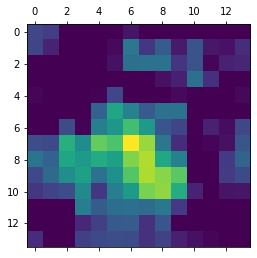

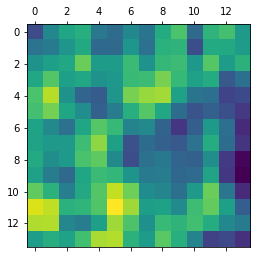

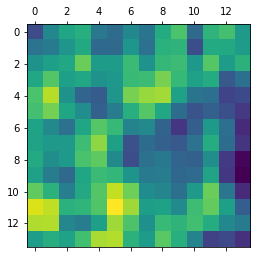

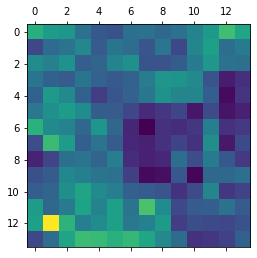

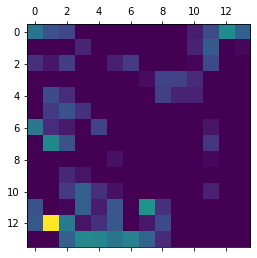

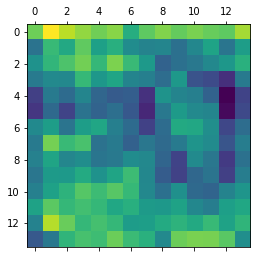

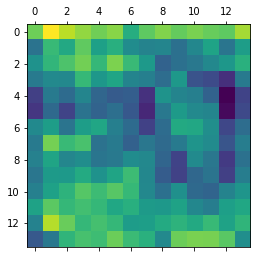

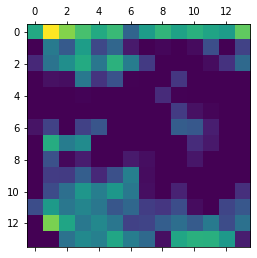

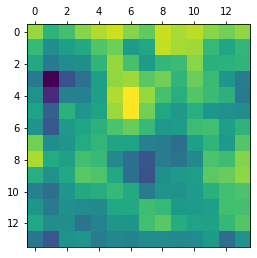

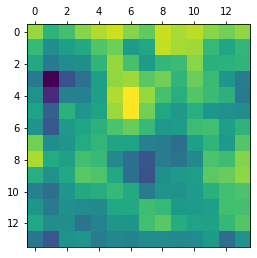

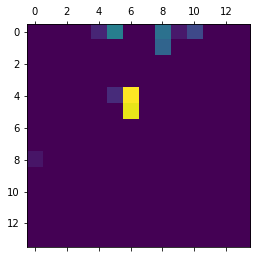

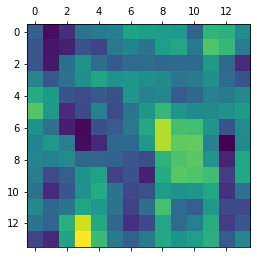

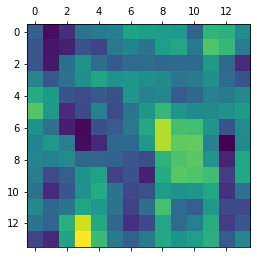

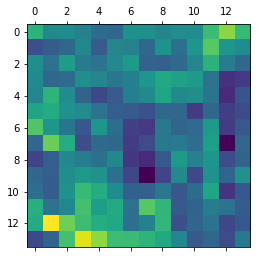

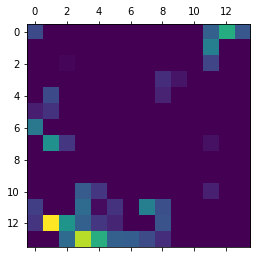

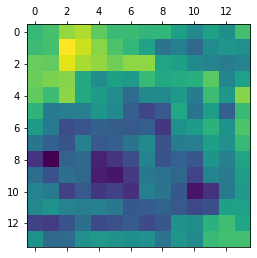

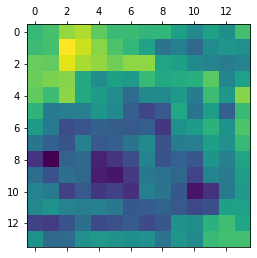

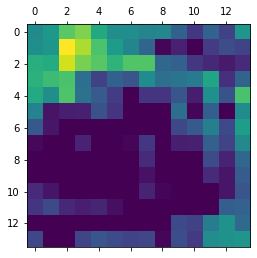

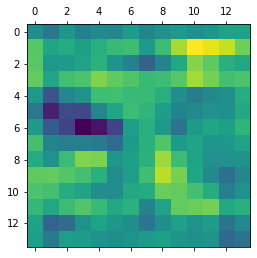

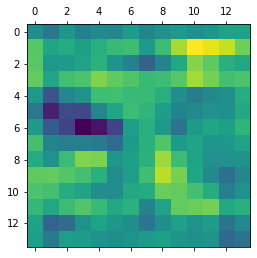

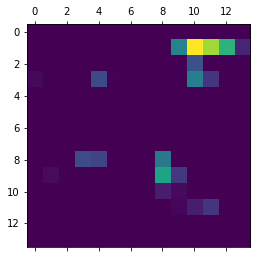

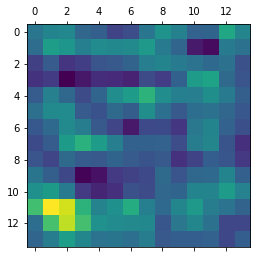

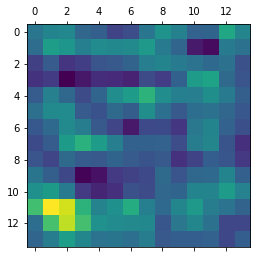

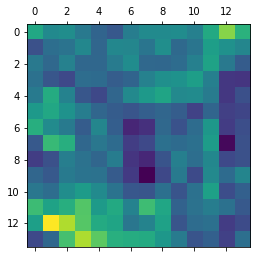

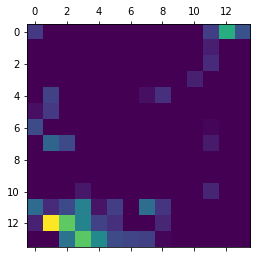

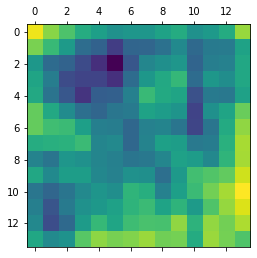

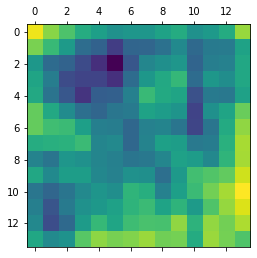

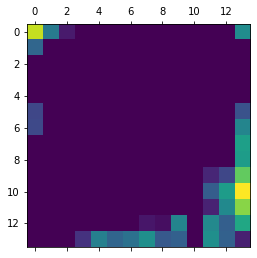

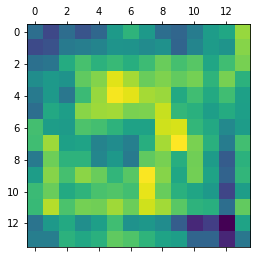

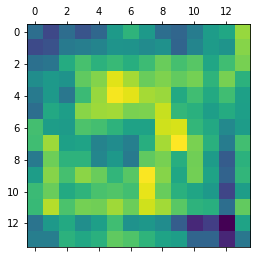

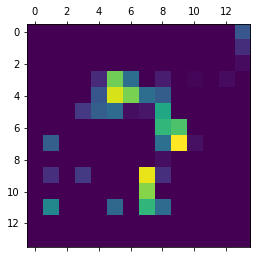

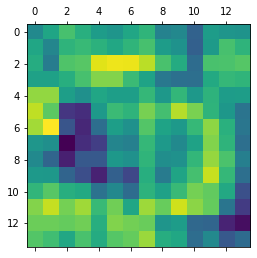

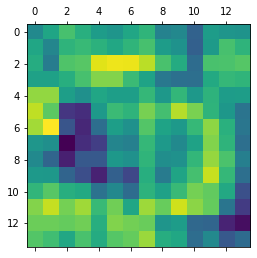

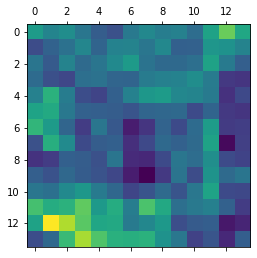

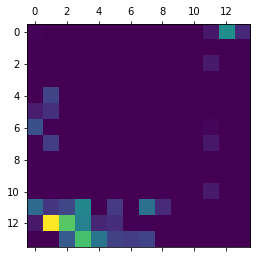

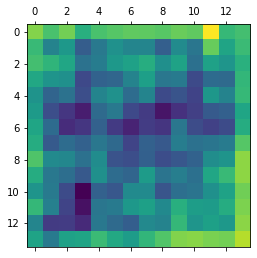

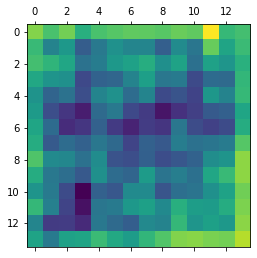

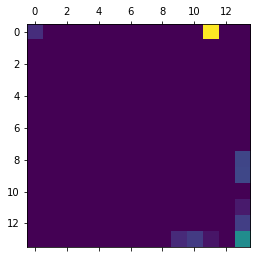

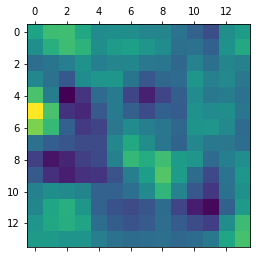

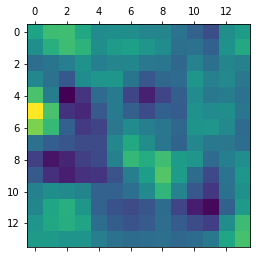

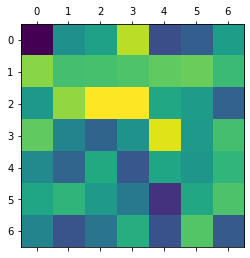

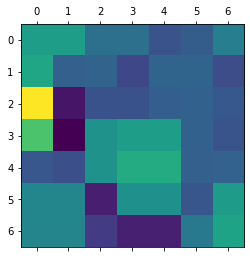

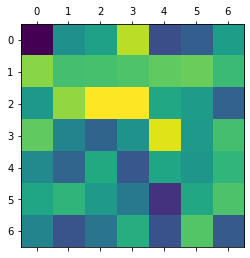

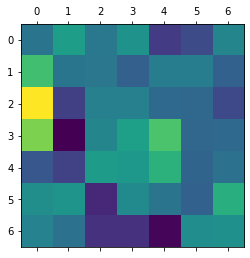

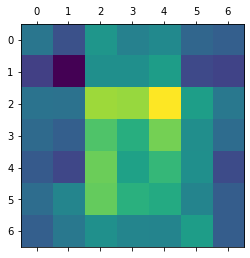

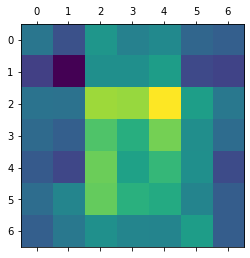

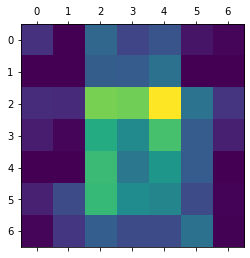

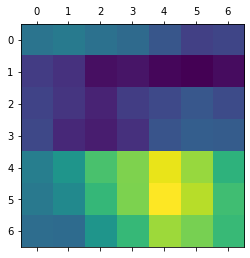

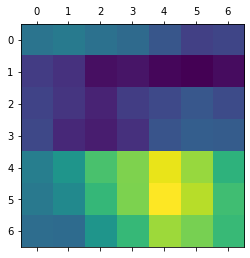

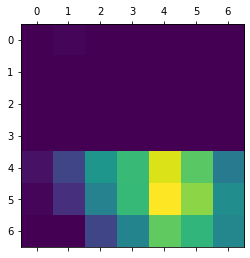

In [50]:
for i in range(0,134):
    act=activations[i]
    print(i)
    plt.matshow(act[0, :, :, 2], cmap ='viridis')

    # 15th channel of the image after first layer of convolution is applied
    


In [59]:
activations = activation_model.predict(test_image)
for layer_name, activations in zip(layer_names, activations): 
    if len(activations.shape) == 3:
        k = activations.shape[-1]  
        size=activations.shape[1]
        for i in range(k):
            feature_image = activations[0, :, :, i]
            feature_image-= feature_image.mean()
            feature_image/= feature_image.std ()
            feature_image*=  64
            feature_image+= 128
            feature_image= np.clip(x, 0, 255).astype('uint8')
            image_belt[:, i * size : (i + 1) * size] = feature_image  
        scale = 20. / k
        plt.figure( figsize=(scale * k, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( image_belt, aspect='auto')

NameError: name 'k' is not defined

NameError: name 'filters' is not defined